# Kaggle API

In [1]:
!pip install kaggle
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


# Downloading Dataset

In [2]:
import os
! mkdir .kaggle
! mv kaggle.json .kaggle/
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge --force
! cp ".kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge/fer2013.tar.gz" .
! tar -xzf fer2013.tar.gz
os.listdir()

mkdir: cannot create directory ‘.kaggle’: File exists
example_submission.csv: Downloaded 7KB of 7KB to /content/.kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge
fer2013.tar.gz: Downloaded 92MB of 92MB to /content/.kaggle/competitions/challenges-in-representation-learning-facial-expression-recognition-challenge


['datalab',
 'fer2013.tar.gz',
 '.local',
 '.rnd',
 '.ipython',
 '.cache',
 'fer2013',
 '.forever',
 '.nv',
 '.kaggle',
 '.config',
 '.keras']

# Data Preprocessing

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('fer2013/fer2013.csv')
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
y = dataset.iloc[:,0:1].values

X = np.zeros(shape=(dataset.shape[0],48,48))

for i in range(dataset.shape[0]):
    a = dataset['pixels'][i].split(' ')
    b = [int(x) for x in a]
    c = np.asarray(b,dtype = 'float32')
    d = c.reshape(48,48)
    X[i] = d
    
X = X.astype('float32')
X = X/255

classes = 7

print(X.shape)
print(y.shape)

(35887, 48, 48)
(35887, 1)


In [6]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
#0=Angry+Disgust, 1=Fear+Surprise, 2=Sad, 3=Happy, 4= Neutral
#apending 2 and 5 to 1; 5 to 2; 6 to 4
#:::: set append = false to avoid changes

def e_ind(x):
    if(x==2 or x==5):
        return 1
    elif(x==4):
        return 2
    elif(x==6):
        return 4
    elif(x==1):
        return 0
    else:
        return x
F_S_D = True
if(F_S_D):
  y = [e_ind(x) for x in y]
  classes = 5
  
y = np.reshape(y,(len(y),1))
max(y)
print(y.shape)

(35887, 1)


In [0]:
index1 = 28709 # Cross-Validation SET ( Public Test )
index2 = 32298 # Final Test SET ( Private Test )

X_train = X[0:index1,:]
X_validate = X[index1:index2,:]
X_test = X[index2:,:]
y_train = y[0:index1,:]
y_validate = y[index1:index2,:]
y_test = y[index2:,:]

In [8]:
print(X_train.shape)
print(y_train.shape)

(28709, 48, 48)
(28709, 1)


In [0]:
# X

# Neural Network

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# Data Reshaping
y_train = np_utils.to_categorical(y_train,classes)
y_validate = np_utils.to_categorical(y_validate,classes)
y_test = np_utils.to_categorical(y_test,classes)
X_train = X_train.reshape(-1,48,48,1)
X_validate = X_validate.reshape(-1,48,48,1)
X_test = X_test.reshape(-1,48,48,1)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)
print(X_test.shape)
print(y_test.shape)


(28709, 48, 48, 1)
(28709, 5)
(3589, 48, 48, 1)
(3589, 5)
(3589, 48, 48, 1)
(3589, 5)


In [12]:
model = Sequential()
# =============================================================================
# Section 1
# =============================================================================
model.add(Convolution2D(128,(4,4),input_shape=(48,48,1),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# =============================================================================
# Section 2
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# =============================================================================
# Section 3
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.2))

# =============================================================================
# Section 4
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# =============================================================================
# Section 5
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.2))

# =============================================================================
# Section 6
# =============================================================================
model.add(Convolution2D(128,(4,4),strides = 1,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

# =============================================================================
# Section 7
# =============================================================================
model.add(Convolution2D(128,(2,2),strides = 1))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(0.2))


model.add(Flatten())

# =============================================================================
# Section 8
# =============================================================================
model.add(Dense(1024))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# =============================================================================
# Section 9
# =============================================================================
model.add(Dense(1024))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# =============================================================================
# Section 10
# =============================================================================
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 45, 45, 128)       2176      
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 45, 45, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       262272    
_________________________________________________________________
batch_normalization_2 (Batch (None, 45, 45, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 45, 45, 128)       0         
__________

In [0]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, batch, logs={}):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [0]:
class AccHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

In [0]:
history1 = LossHistory()
history2 = AccHistory()

In [0]:
from keras.callbacks import ModelCheckpoint
filepath1="weights.best.acc.imp.5.classes.hdf5"
filepath2="weights.best.loss.imp.5.classes.hdf5"
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint1,checkpoint2,history1,history2]


In [18]:
model.fit(X_train, y_train, 
          batch_size=32, shuffle = True , epochs=16, verbose=2, validation_data = (X_validate,y_validate),callbacks=callbacks_list)

Train on 28709 samples, validate on 3589 samples
Epoch 1/16


ResourceExhaustedError: ignored

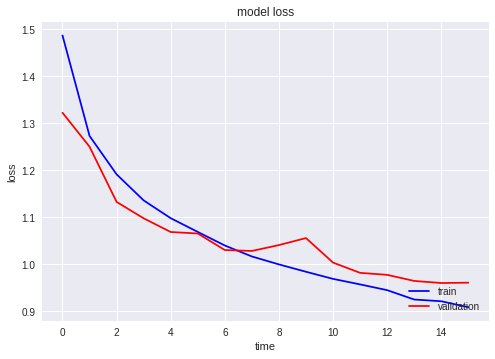

In [20]:
loss_path = '_Loss_Curve'
plt.plot(history1.train_losses,color = 'blue')
plt.plot(history1.val_losses,color = 'red')
#plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('time')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plt.savefig(model_name+loss_path+'.png')

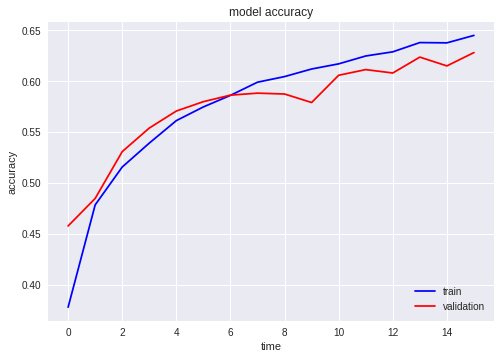

In [21]:
acc_path = '_Accuracy_Curve'
plt.plot(history2.train_acc,color = 'blue')
plt.plot(history2.val_acc,color = 'red')
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('time')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# plt.savefig(model_name+acc_path+'.png')

In [22]:
print(history1.train_losses)
print(history1.val_losses)
print(min(history1.val_losses))

[1.4871665000284373, 1.273405011393084, 1.1916954335533898, 1.1362832112099552, 1.0984207677626927, 1.0691885465181934, 1.0403308058537437, 1.0169935455721804, 1.0001440374798658, 0.9844891297235489, 0.9693242294079392, 0.9576163650900225, 0.9453698440905072, 0.9254383199528602, 0.921763000756854, 0.909088628000341]
[1.3227190597371559, 1.2504512579469635, 1.1330499512865604, 1.098159363622551, 1.06902859580653, 1.065857976085464, 1.0307226462362868, 1.028740531606374, 1.0412127233607817, 1.0561635056456073, 1.0039733922325424, 0.9821726841892031, 0.9779357422225221, 0.9649629802151157, 0.960564270362312, 0.961281718567375]
0.960564270362312


In [23]:
print(history2.train_acc)
print(history2.val_acc)
print(max(history2.val_acc))

[0.37799993033647294, 0.47849106552004256, 0.5156571110115226, 0.5391340694566095, 0.5612177366024316, 0.5746629976662371, 0.5860183217847786, 0.598941098610192, 0.6044445992587415, 0.6118987077243933, 0.6169493886939601, 0.6246821554257971, 0.6287575324821416, 0.6378487582301648, 0.63757009996917, 0.6448848793082171]
[0.4577876845959602, 0.4848147116271391, 0.530788520483394, 0.5539147394900535, 0.5706324881914765, 0.5798272499344946, 0.5862357202604908, 0.5881861242852061, 0.5873502368679882, 0.5789913625297323, 0.6057397603872394, 0.6113123433043214, 0.607968793569019, 0.6235720256421851, 0.6149345221593208, 0.6280300919559215]
0.6280300919559215


In [0]:
# Comparison based on Losses ( Min )
model.load_weights(filepath2)

In [25]:
validation_score = model.evaluate(X_validate, y_validate, verbose=1)
test_score = model.evaluate(X_test, y_test, verbose=1)
print(' Validation SET Accuracy = '+ str(validation_score[1]*100))
print(' Test SET Accuracy = '+ str(test_score[1]*100))


3589/3589 [==============================] - 2s 502us/step
 Validation SET Accuracy = 61.493452215932074
 Test SET Accuracy = 62.858735024513855


In [26]:
print(X_validate.shape)
print(y_validate.shape)


(3589, 48, 48, 1)
(3589, 5)


# Visualization

In [0]:
def overview(start, end, X):
    fig = plt.figure(figsize=(8,10))
    for i in range(start, end+1):
        input_img = X[i]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img, cmap='gray')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

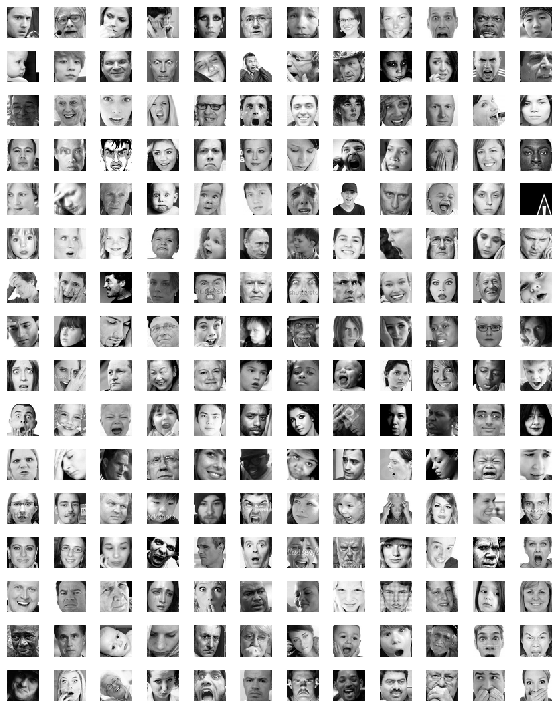

In [0]:
overview(0,191, X) # overview of face data as thumbnails (private)

In [0]:
config = model.get_config()
print(config)

[{'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'filters': 128, 'kernel_size': (4, 4), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_5', 'trainable': True, 'filters': 128, 'kernel_size': (4, 4), 'strides': (2, 2), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_a

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
os.listdir()

['datalab',
 '.forever',
 'weights.best.loss.hdf5',
 'fer2013',
 '.kaggle',
 '.config',
 '.rnd',
 '.cache',
 'weights.best.acc.hdf5',
 '.keras',
 '.nv',
 'model_conv_Loss_Curve.png',
 '.local',
 '.ipython',
 'fer2013.tar.gz',
 'model_conv_Accuracy_Curve.png']

In [0]:
from google.colab import files
files.download(filepath1)
files.download(filepath2)

In [0]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Metrics

In [28]:
y_prob = model.predict(X_test, batch_size=32, verbose=1)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

3589/3589 [==============================] - 2s 522us/step


In [29]:
!pip install brewer2mpl
import matplotlib
import brewer2mpl
set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors

In [0]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry/Disgust',1:'Fear/Surprise', 2:'Sad', 3:'Happy', 4:'Neutral', 5:'Surprise'}
    for i in range(start, end+1):
        input_img = X[i+index2]
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel(emotion[y_true[i]], color='#53b3cb',fontsize=12)
        else:
            plt.xlabel(emotion[y_true[i]], fontsize=12)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [0]:
def plot_probs(start,end, y_prob):
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X[i+index2]
        ax = fig.add_subplot(6,6,i+1)
        ax.bar(np.arange(0,5), y_prob[i], color=set3,alpha=0.9)
        ax.set_xticks(np.arange(0.5,6.5,1))
        labels = ['angry/disgust','fear/surprise', 'sad' ,'happy', 'neutral']
        ax.set_xticklabels(labels, rotation=90 ,fontsize=12)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [0]:
def plot_subjects_with_probs(start, end, y_prob):
    iter = (end - start)/6
    for i in np.arange(0,iter):
        plot_subjects(int(i*6),int((i+1)*6-1), y_pred, y_true, title=False)
        plot_probs(int(i*6),int((i+1)*6-1), y_prob)

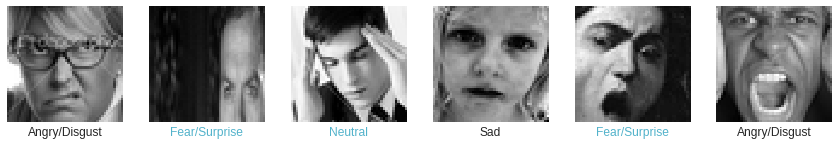

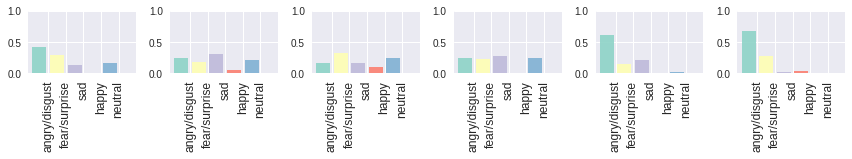

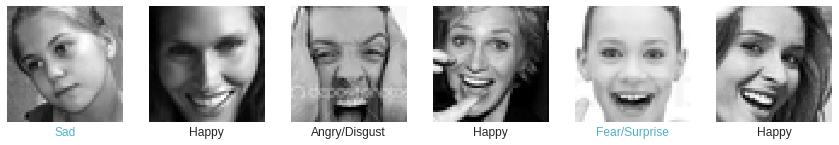

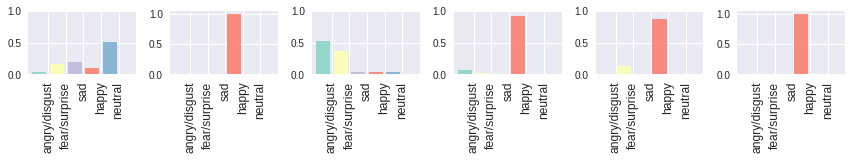

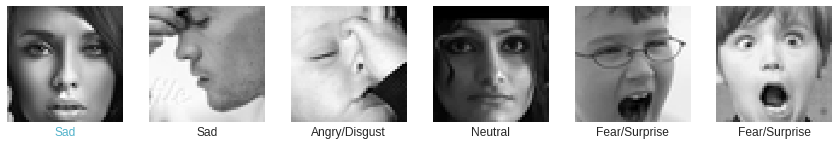

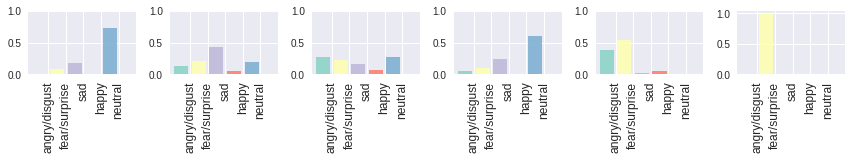

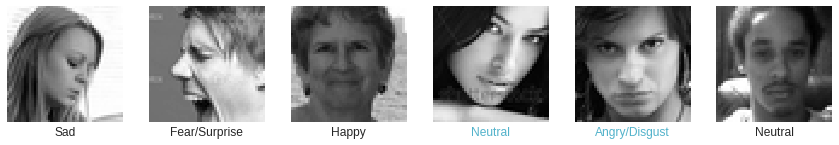

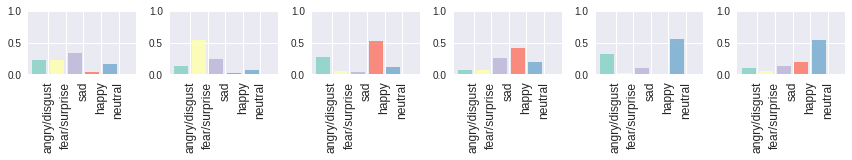

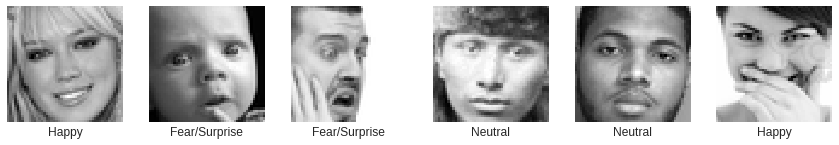

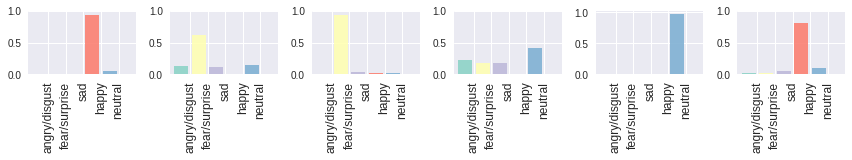

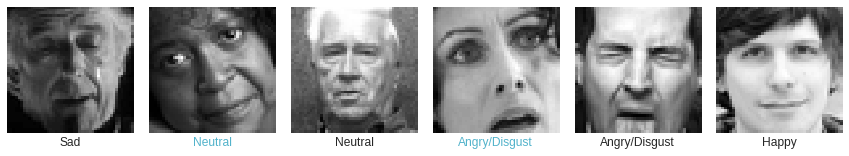

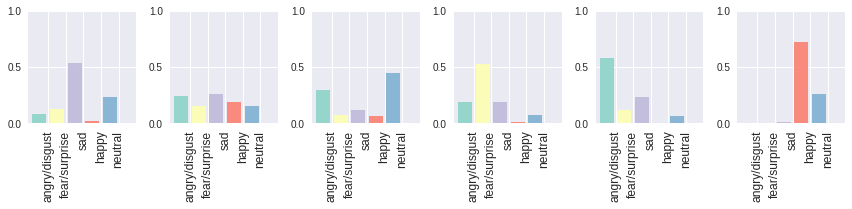

In [41]:
plot_subjects_with_probs(0, 36, y_prob)

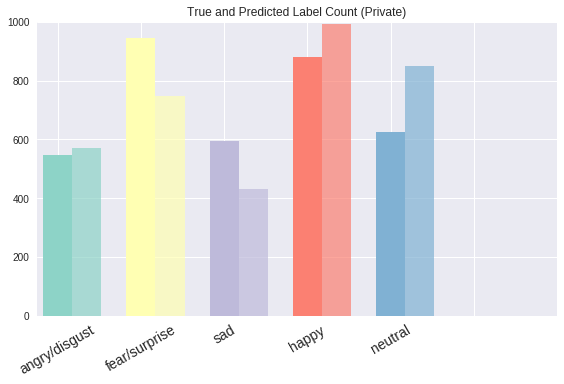

In [47]:
def plot_distribution(y_true, y_pred):
    ind = np.arange(1.5,6,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color=set3, alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color=set3, alpha=0.7)
    ax.set_xticks(np.arange(1.5,7,1))
    labels = ['angry/disgust','fear/surprise', 'sad' ,'happy', 'neutral']
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 7.5])
    ax.set_ylim([0, 1000])
    ax.set_title('True and Predicted Label Count (Private)')
    plt.tight_layout()
    plt.show()
    
plot_distribution(y_true, y_pred)

In [0]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(5,5))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,5):
        for j in range(0,5):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    labels = ['angry', 'neutral','fear', 'happy', 'sad', 'surprise']
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

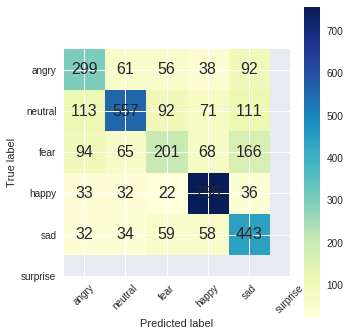

In [51]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

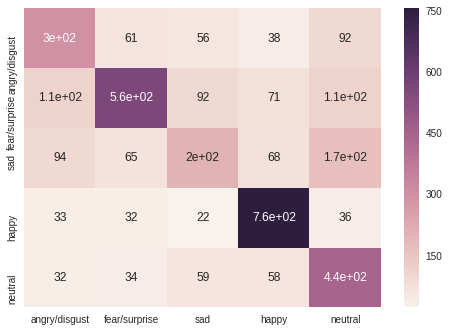

In [53]:
# Heat Map

labels = ['angry/disgust','fear/surprise', 'sad' ,'happy', 'neutral']

import seaborn as sn
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm,index = [labels[i] for i in range(0,5)],columns = [labels[i] for i in range(0,5)])
sn.set(font_scale = 1)
sn.heatmap(df_cm,annot = True)


In [0]:
labels = ['angry/disgust','fear/surprise', 'sad' ,'happy', 'neutral']

In [0]:
def class_precision(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    col = [cm[j,i] for j in range(0,5)]
    return float(col[i])/sum(col)

def class_recall(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    row = [cm[i,j] for j in range(0,5)]
    return float(row[i])/sum(row)

def class_accuracy(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    tp = cm[i,i]
    fn = sum([cm[i,j] for j in range(0,5) if j != i])
    fp = sum([cm[j,i] for j in range(0,5) if j != i])
    tn = sum([cm[i,j] for j in range(0,5) for i in range(0,5)]) -(tp+fp+fn)
    return float(tp + tn)/sum([tp, fn, fp, tn])

In [60]:
for emotion in labels:
    print (emotion)
    print ('   acc = {}'.format(class_accuracy(y_true, y_pred, emotion)))
    print ('  prec = {}'.format(class_precision(y_true, y_pred, emotion)))
    print ('recall = {}\n'.format(class_recall(y_true, y_pred, emotion)))

angry/disgust
   acc = 0.8553914739481749
  prec = 0.5236427320490368
recall = 0.5476190476190477

fear/surprise
   acc = 0.8386737252716634
  prec = 0.7436582109479306
recall = 0.590042372881356

sad
   acc = 0.8266926720534968
  prec = 0.46744186046511627
recall = 0.3383838383838384

happy
   acc = 0.9002507662301477
  prec = 0.7628657921291625
recall = 0.8600682593856656

neutral
   acc = 0.8361660629701867
  prec = 0.5224056603773585
recall = 0.707667731629393



In [61]:
from sklearn.metrics import classification_report
print (classification_report(y_true, y_pred, target_names=labels))


               precision    recall  f1-score   support

angry/disgust       0.52      0.55      0.54       546
fear/surprise       0.74      0.59      0.66       944
          sad       0.47      0.34      0.39       594
        happy       0.76      0.86      0.81       879
      neutral       0.52      0.71      0.60       626

  avg / total       0.63      0.63      0.62      3589



In [63]:
n = len(y_true)
y_fir = []
y_sec = []
y_trd = []
for i in range(n):
    if y_true[i] == np.argsort(y_prob[i])[-1]:
        y_fir.append([i, y_true[i]])
    if y_true[i] == np.argsort(y_prob[i])[-2]:
        y_sec.append([i, y_true[i]])
    if y_true[i] == np.argsort(y_prob[i])[-3]:
        y_trd.append([i, y_true[i]])
print (float(len(y_fir))/n)
print (float(len(y_sec))/n)
print (float(len(y_trd))/n)

0.6285873502368348
0.19169685149066593
0.10002786291446085


In [0]:
misclass = [float(len(y_fir))/n, float(len(y_sec))/n, float(len(y_trd))/n]

In [65]:
len(y_sec)/(len(y_true)*0.58)


0.33051181291494125

In [66]:
len(y_true)*0.58

2081.62

(array([113.,   0., 194.,   0.,   0., 214.,   0.,  62.,   0., 105.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

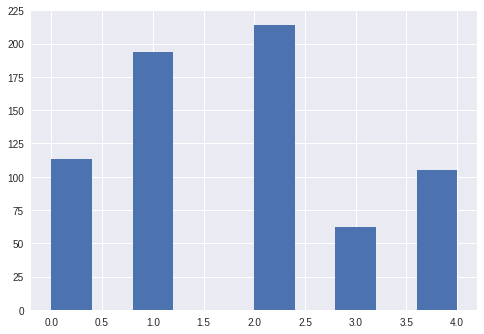

In [67]:
plt.hist([pair[1] for pair in y_sec])

In [68]:
from sklearn.metrics import hamming_loss
hamming_loss(y_true, y_pred)

0.37141264976316524

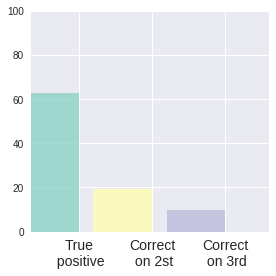

In [69]:
def plot_misclass_distribution(y, tags): 
    fig = plt.figure(figsize=(4,4))
    ax1 = fig.add_subplot(1,1,1)
    ax1.bar(np.arange(1,len(y)+1), np.array(y)*100, color=set3, alpha=0.8)
    ax1.set_xticks(np.arange(1.40,len(y)+1.40,1))
    ax1.set_xticklabels(tags, rotation=0, fontsize=14)
    ax1.set_xlim([0.75, len(y)+1])
    ax1.set_ylim([0,100])
    ax1.grid(True)
    ax1.set_title('')
    plt.tight_layout()
    plt.show()
tags = ['True\n positive','Correct\n on 2st','Correct\n on 3rd']
plot_misclass_distribution(misclass, tags)